## 在codelab 有兩種cell
* Markdown language
* python

# **Topic: Linear Regression**
### Method Follow CRISP-DM 
<img src="https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png" width=500>

[連結文字](https://)## Step 1: Load Data (把資料讀進python)

In [17]:
import pandas as pd
data=pd.read_csv("dataN.csv")
print(data.head())
print(data.info())
print(data.describe())
print(type(data))
print(data.columns,data.index)



      x             y
0   680   8648.494704
1   161   2276.223519
2   321   4469.314024
3   175   2776.517896
4  1001  10214.141390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       156 non-null    int64  
 1   y       156 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB
None
                 x             y
count   156.000000    156.000000
mean    557.788462   6549.571669
std     299.342376   3002.645983
min       0.000000    721.756475
25%     318.750000   4142.973355
50%     560.000000   6507.179274
75%     813.250000   9207.855106
max    1021.000000  11770.797770
<class 'pandas.core.frame.DataFrame'>
Index(['x', 'y'], dtype='object') RangeIndex(start=0, stop=156, step=1)


a= 10 b= 3


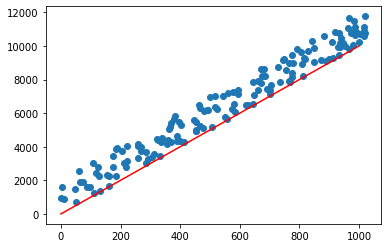

a= -20 b= 3


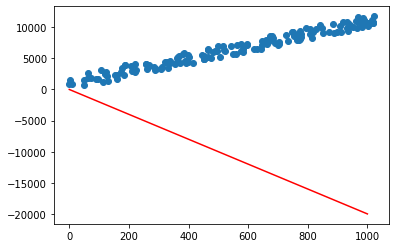

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def plotmodel(a=10,b=10):
  print("a=",a,"b=",b)
  plt.scatter(data.x,data.y)
  mx = np.array([0,1000])
  my= a*mx+b
  plt.plot(mx,my,'r')
  plt.show()

plotmodel(10,3)
plotmodel(-20,3)

## Step 2: Prepoare X, Y

* data missing = use imputor 插補
* data 不能運算 轉換 =example 'female'=0,'male'=1
* data type transformation for不同套件 tuple, ndarry, int, DataFrame 
* normalization
* data augmentation 資料不夠
* data preprocessing for image, speech, 抓取特徵feature engineering


In [19]:
print(type(data))
print(data.columns)
# 基礎寫法
X=data.x.values.reshape(-1,1)
Y=data['y'].values.reshape(-1,1)
print("X type=",type(X),X.shape)
# 進階寫法
X=data.iloc[:,:-1].values.reshape(-1,1)
Y=data.iloc[:,-1].values.reshape(-1,1)
print(type(Y))


<class 'pandas.core.frame.DataFrame'>
Index(['x', 'y'], dtype='object')
X type= <class 'numpy.ndarray'> (156, 1)
<class 'numpy.ndarray'>


## Step 3: Select Model

9.850824044906895 1054.8956796399134
a= 9.850824044906895 b= 1054.8956796399134


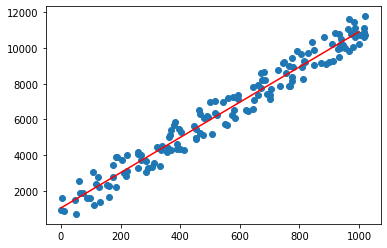

In [20]:
from sklearn.linear_model import LinearRegression as LR
model =LR()
model.fit(X,Y)
a = float(model.coef_)
b = float(model.intercept_)
print(a,b)
plotmodel(a,b)

## Step 4: Evaluate Model Performance

* r2 score
* MAE : absolute error
* MSE : squre error

In [21]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
y_true = Y
y_pred = model.predict(X)
r2score=r2(y_true, y_pred)
print("r2 score is ",r2score)
mae=mae(y_true, y_pred)
print("MAE score is ",mae)
mse=mse(y_true, y_pred)
print("MSE score is ",mse)


r2 score is  0.9644356706862213
MAE score is  488.1821939612874
MSE score is  318588.4193055028


## Step 5: Deploy Prediction

In [22]:
data['preY']=y_pred
data.head()
data.to_csv("result.csv",index=False,mode='w')